<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Séries Temporais
Caderno de **Aula**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Wrangling;</li>
  <li>Decomposição.</li>
</ol>

---

# **Aulas**

## 0\. Abordagens estatísticas

*   **Descritiva**: foco no passado para entender o **presente**.
*   <font color='red'>**Preditiva**</font>: foca no passado para inferir o **futuro**.

## 1\. Introdução

### **1.1. Motivação** 

Neste módulo, vamos analisar dados sobre o consumo de energia elétrica residencial, comercial e industrial, em mega watts (MWh), da região sudeste do Brasil, entre os anos de 2004 e 2020. O conjunto de dados está neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv) e foi inspirado no conjunto de dados da Empresa de Pesquisa Energética (EPE), estatal do governo vinculada ao ministério de minas e energia, presente neste [link](https://www.epe.gov.br/pt/publicacoes-dados-abertos/publicacoes/consumo-de-energia-eletrica). 

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [3]:
data = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.info()

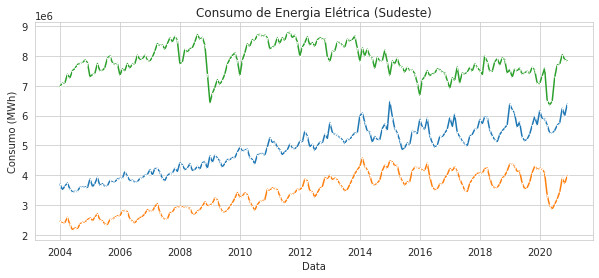

In [7]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=data, x='referencia', y='comercial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=data, x='referencia', y='industrial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

### **1.2. Definição** 

Uma **série temporal** é um conjunto de dados composto pela coleta de amostras de uma ou mais variáveis em intervalos **fixos** de tempo (granularidade). É muito utilizada para análise do mercado de renda variável, dados econômicos, consumo de energia elétrica, etc.

> Uma série temporal representa a evolução de um fenômeno ao longo do tempo.

Note que o **tempo** é uma variável fundamental para esse tipo de análise. Portanto, note que:

 - O intervalo entre as medições é conhecido como **grão**;
 - A granularidade deve ser **fixa** para uma mesma série temporal;
 - Duas séries temporais só podem ser efetivamente comparadas se estiverem na mesma **granularidade**.

Séries temporais podem ser **decompostas** em componentes, são eles:

 - **Tendência**: Direção da evolução da variável ao longo do tempo;
 - **Sazonalidade**: Flutuações periódicas;
 - **Resíduo**: O restante, combinação linear de ruído e erros. 

## 2\. Wrangling

O pacote Pandas trás uma série de métodos e funções que ajudam na manipulação de séries temporais.

### **2.1. Indexação** 

Como as séries temporais são indexadas pelo tempo, podemos transformar a coluna temporal nos índices de uma dataframe Pandas, permitindo assim diversas operações "temporais".

In [ ]:
data.head()

In [9]:
data = data.set_index(keys=['referencia'])

In [ ]:
data.head()

### **2.2. Slicing** 

O *slicing* ou corte (ou ainda fatiamento) é o processo de **selecionar** um intervalo de tempo de uma série temporal. Esse processo permite focar a análise de intervalos de tempo de interesse.

 - **Exemplo:** *Slicing* por ano.

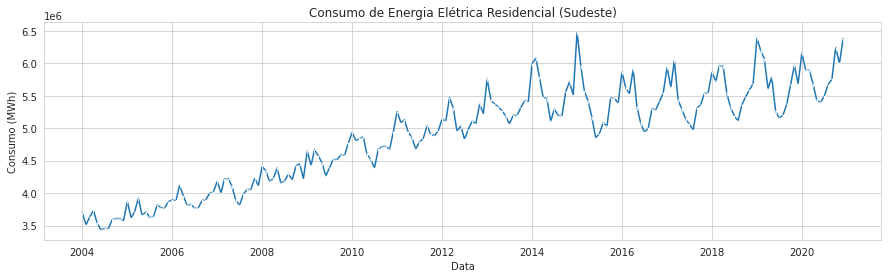

In [12]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(15, 4)

In [ ]:
data['2019'].head()

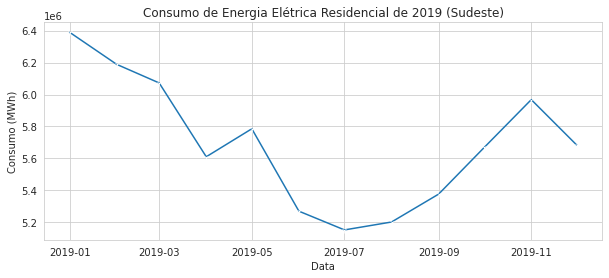

In [16]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data['2019'], x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial de 2019 (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

 - **Exemplo:** *Slicing* por intervalo de meses.

In [ ]:
data['2019-01':'2019-06'].head()

 - **Exemplo:** *Slicing* por intervalo de dias.

In [19]:
data['2019-01-15':'2019-02-15'].head()

,residencial,industrial,comercial
referencia,,,
2019-02-01,6188834,7285407,4365504


### **2.3. Resampling** 

*Resampling* ou reamostragem é o processo de **aumentar/diminuir** a **granularidade** de uma série temporal, como ir segundos para horas ou de dias para meses, por exemplo. Para tanto, os dados dentro do intervalo de tempo devem ser agrupados por uma operação de **agregação** como soma ou média. Esse processo permite o resumo dos dados de uma série temporal.

- **Exemplo:** *Resampling* por trimestre.

 > **Nota**: O método `resample` do pacote Pandas utiliza o mesmo padrão de datas que o módulo `datetime` nativo do Python. O padrão pode ser conferido neste [link](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).

In [20]:
resampled = data.resample(rule='3m').mean()

In [ ]:
resampled.head()

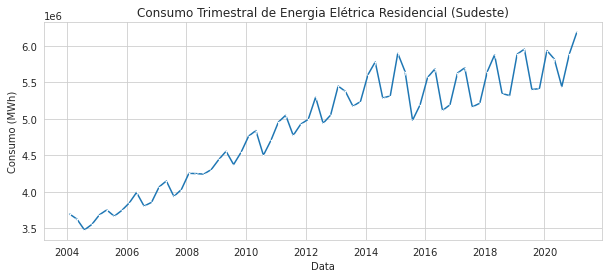

In [22]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=resampled, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo Trimestral de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

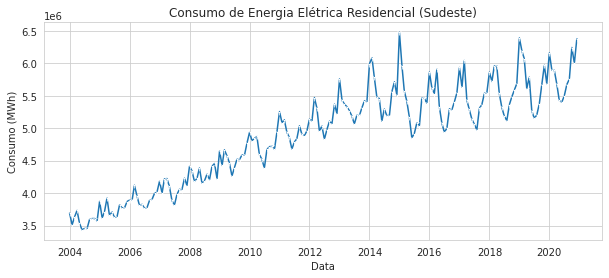

In [23]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

### **2.4. Visualização** 

o gráfico de linha é naturalmente o mais indicado para a visualicão de séries temporais. Esse tipo de visualização pode ser complementado com múltiplos gráficos de linha utilizando um intervalo de tempo de interesse.

 - **Exemplo:** Consumo residencial por ano.

In [24]:
data['month'] = data.index.month
data['year'] = data.index.year

In [ ]:
data.head()

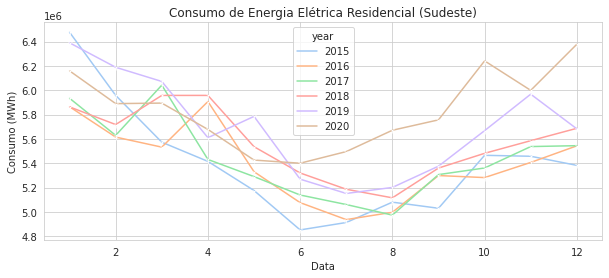

In [26]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data['2015':'2020'], x='month', y='residencial', hue='year', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

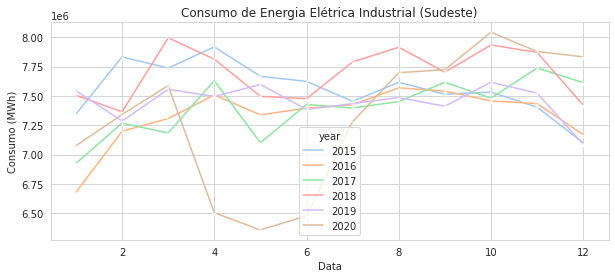

In [27]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data['2015':'2020'], x='month', y='industrial', hue='year', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Industrial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

## 3\. Componentes

Uma série temporal pode ser interpretada como a combinação linear de três componentes: tendência, sazonalidade e resíduo. Cada componente busca explicar uma característica da série temporal:

 - **Tendência**: Direção da evolução da variável ao longo do tempo;
 - **Sazonalidade**: Flutuações periódicas;
 - **Resíduo**: O restante, combinação linear de ruído e erros. 

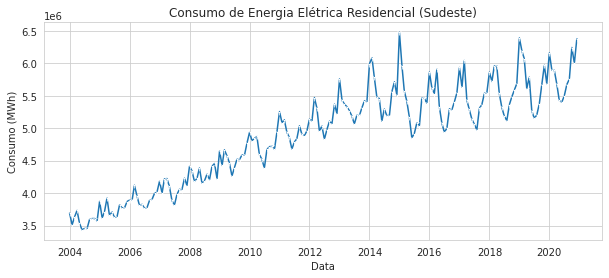

In [28]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")  
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

### **3.1. Pacote statsmodels** 

**statmodels** é um pacote Python utilizado para exploração e visualização de dados através do uso de técnicas avançadas de estatística. A documentação pode ser encontrada neste [link](https://www.statsmodels.org/stable/index.html). Possui uma excelente integração com os DataFrames do pacote Python Pandas.

In [ ]:
import statsmodels.api as sm

### **3.2. Decomposição** 

Vamos utilizar o método `seasonal_decompose` do pacote statsmodel para decomport uma série temporal em suas componentes.

In [30]:
decomposicao = sm.tsa.seasonal_decompose(data[['residencial']], model='additive')

In [31]:
residuo = decomposicao.resid
tendencia = decomposicao.trend
sazonalidade = decomposicao.seasonal

In [ ]:
sazonalidade.head()

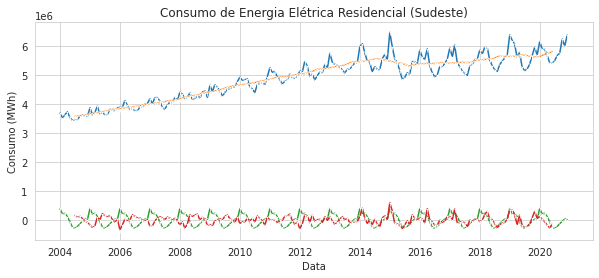

In [33]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=tendencia, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=sazonalidade, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=residuo, x='referencia', y='residencial', marker="1", palette="pastel")
  
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

### **3.3. Tendência** 

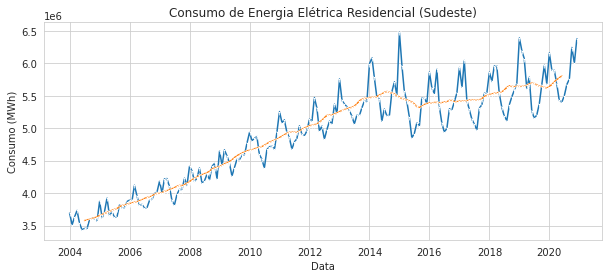

In [34]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=tendencia, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

### **3.4. Sazonalidade** 

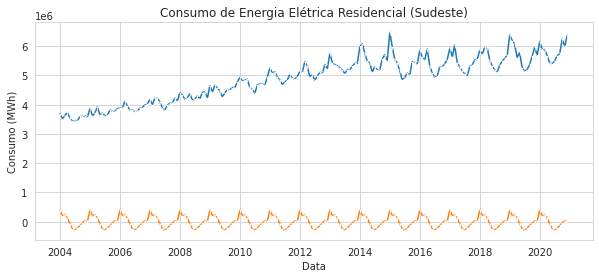

In [35]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=sazonalidade, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

### **3.5. Resíduo** 

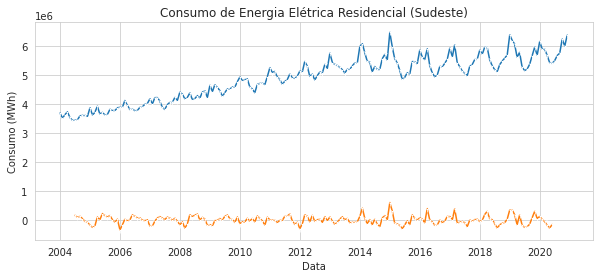

In [36]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=residuo, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)